In [ ]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [ ]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
ds = tfds.load('fashion_mnist', split='train')
type(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLXPD23/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLXPD23/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
ds.as_numpy_iterator().next()['image'].shape

(28, 28, 1)

## Visualize Fashion Images Data

In [ ]:
import numpy as np

In [ ]:
dataiterator = ds.as_numpy_iterator()


In [ ]:
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


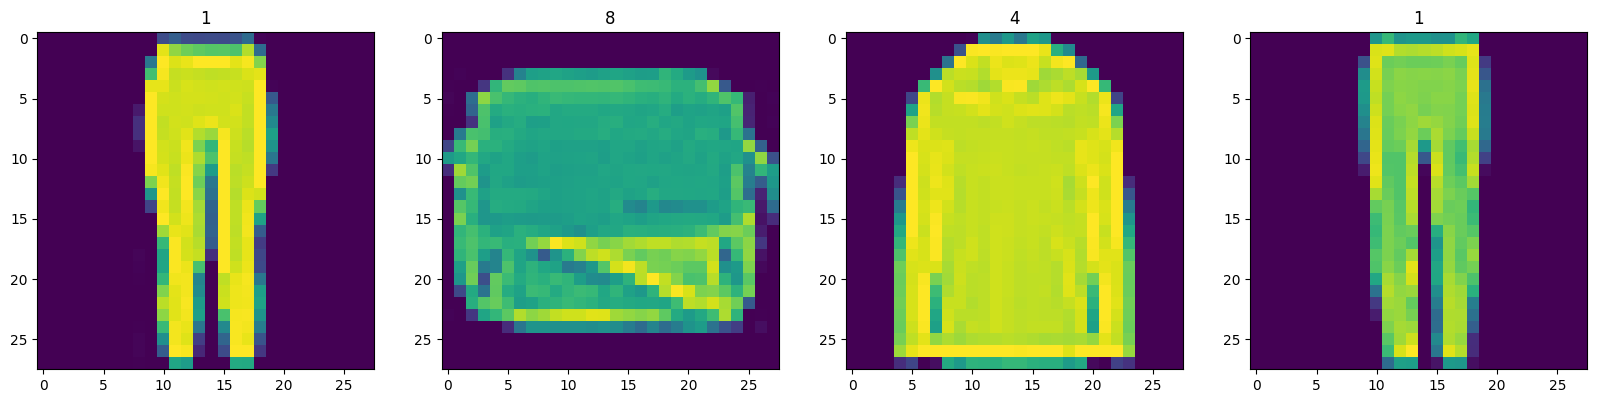

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx in range(4):
    sample= dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])
    print(sample['image'].shape)
    #print(discriminator_model.predict(sample['image']))

In [ ]:
def scale_images(data):
  image = data['image']
  return image / 255

### Data Processing

In [ ]:
#Data processing pipeline
ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_images) #map
ds = ds.cache() #cache
ds = ds.shuffle(6000) #shuffle
ds = ds.batch(128) #batch
ds = ds.prefetch(64) #prefetch

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Buiding Neural Networks for the GAN Model(Generator & Discriminator)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D, Conv2D

### Build Generator

In [ ]:
def build_generator():
  model = Sequential()
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))
  #Upsampling Block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(LeakyReLU(0.2))
  #Upsampling Block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(LeakyReLU(0.2))
  #Conv Block 1
  model.add(Conv2D(128, kernel_size=4, padding='same'))
  model.add(LeakyReLU(0.2))
  #Conv Block 2
  model.add(Conv2D(128, kernel_size=4, padding='same'))
  model.add(LeakyReLU(0.2))
  #Output Conv Block
  model.add(Conv2D(1, kernel_size=4, padding='same', activation="sigmoid"))
  return model

In [ ]:
generator_model = build_generator()
generator_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [ ]:
img = generator_model.predict(np.random.rand(4, 128, 1))
print(img.shape)

1/1 [==============================] - 2s 2s/step
(4, 28, 28, 1)


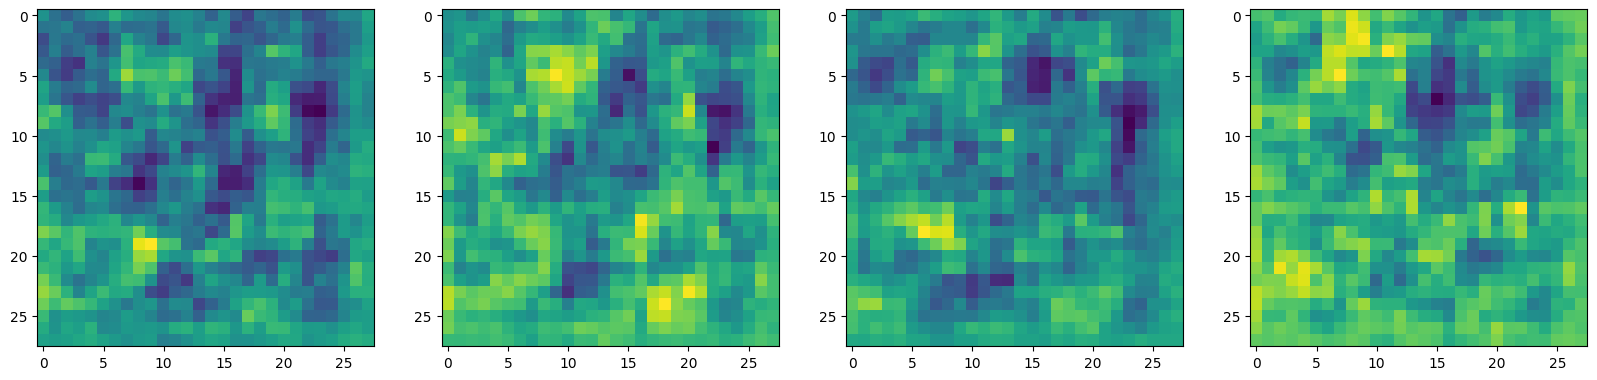

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))

for idx, img_sub in enumerate(img):
    sample= img_sub
    ax[idx].imshow(np.squeeze(sample))

### Build Discriminator

In [ ]:
def build_discriminator():
  model = Sequential()
  #Conv Block 1
  model.add(Conv2D(32, kernel_size=5, input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Conv Block 2
  model.add(Conv2D(64, kernel_size=5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Conv Block 3
  model.add(Conv2D(128, kernel_size=5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Conv Block 4
  model.add(Conv2D(256, kernel_size=5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Flatten and Dense Layer or classificatio
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation="sigmoid"))
  return model

In [ ]:
discriminator_model = build_discriminator()
discriminator_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
discriminator_model.predict(img)

1/1 [==============================] - 0s 300ms/step


array([[0.5009834 ],
       [0.5010344 ],
       [0.5010122 ],
       [0.50100833]], dtype=float32)

### Construct Training Loop


In [ ]:
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
#Import Adam optimizer for generator and discriminator
from tensorflow.keras.optimizers import Adam
#Import Bimary Cross Entropy for generator and discriminator
from tensorflow.keras.losses import BinaryCrossentropy

Define Losses and Optimizers

In [ ]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [ ]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)
    #Create attributes for generator and discriminator object
    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    super().compile(*args, **kwargs)
    #Create attributes for losses and optimizers
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):
    #Get Real and Fake image data
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)), training=False)

    #Train the discriminator
    with tf.GradientTape() as d_tape:
      real_output = self.discriminator(real_images, training=True)
      fake_output = self.discriminator(fake_images, training=True)
      real_fake_output = tf.concat([real_output, fake_output], axis=0)
      real_fake_labels = tf.concat([tf.zeros_like(real_output), tf.ones_like(fake_output)], axis=0)
      #Add Noise for real and fake image labels
      noise_real = 0.15 * tf.random.normal(tf.shape(real_output))
      noise_fake = -0.15 * tf.random.normal(tf.shape(fake_output))
      #Adding noise to 'original' labels
      real_fake_labels += tf.concat([noise_real, noise_fake], axis=0)
      #Calculate Loss - BinaryCrossentropy
      total_d_loss = self.d_loss(real_fake_labels, real_fake_output)

    #Calculate Gradients
    d_grad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(d_grad, self.discriminator.trainable_variables))

    #Train the generator
    with tf.GradientTape() as g_tape:
      #Generated Images
      gen_images = self.generator(tf.random.normal((128,128,1)), training=False)
      #Predict Labels by discriminator
      predicted_labels = self.discriminator(gen_images, training=False)
      #Calculate Loss - BinaryCrossentropy
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    #Calculate Gradients
    g_grad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(g_grad, self.generator.trainable_variables))

    return {"d_loss": total_d_loss, "g_loss": total_g_loss}


In [ ]:
#Create Instance of GAN model
fashgan = FashionGAN(generator=generator_model, discriminator=discriminator_model)

In [ ]:
#Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### Write Callbacks

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
!rm -r train_check_points
!rm -r generated_images

rm: cannot remove 'train_check_points': No such file or directory
rm: cannot remove 'generated_images': No such file or directory


In [ ]:
#make directory to store generated images
if not os.path.exists("train_check_points"):
  print(1)
  os.mkdir("train_check_points")

1


In [ ]:
#make directory to store generated images
if not os.path.exists("generated_images"):
  print(1)
  os.mkdir("generated_images")

1


In [ ]:
class ModelMonitor(Callback):
  def __init__(self, num_img = 3, latent_dim=128):
    super().__init__()
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    if epoch % 10 == 0:
      self.model.generator.save(filepath=f"/content/train_check_points/generator{epoch}.h5")
      self.model.discriminator.save(filepath=f"/content/train_check_points/discriminator{epoch}.h5")
      for i in range(self.num_img):
        img = array_to_img(generated_images[i])
        img.save(os.path.join("generated_images", f"generated_img_{epoch}_{i}.png"))

## Training the Model

In [ ]:
data = ds.as_numpy_iterator().next()
tf.shape(data)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([128,  28,  28,   1], dtype=int32)>

In [ ]:
hist = fashgan.fit(ds, epochs=200, callbacks=[ModelMonitor()])

Epoch 1/200
469/469 [==============================] - ETA: 0s - d_loss: 0.7022 - g_loss: 0.9204

469/469 [==============================] - 77s 158ms/step - d_loss: 0.7018 - g_loss: 0.9200
Epoch 2/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6080 - g_loss: 1.0376

469/469 [==============================] - 75s 161ms/step - d_loss: 0.6076 - g_loss: 1.0399
Epoch 3/200
469/469 [==============================] - ETA: 0s - d_loss: 0.1462 - g_loss: 7.4535

469/469 [==============================] - 76s 162ms/step - d_loss: 0.1459 - g_loss: 7.4644
Epoch 4/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0139 - g_loss: 15.8091

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0140 - g_loss: 15.8134
Epoch 5/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0049 - g_loss: 19.3811

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0051 - g_loss: 19.3849
Epoch 6/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0051 - g_loss: 21.1482

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0050 - g_loss: 21.1539
Epoch 7/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0070 - g_loss: 22.2807

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0074 - g_loss: 22.2826
Epoch 8/200
469/469 [==============================] - ETA: 0s - d_loss: 0.1112 - g_loss: 11.9808

469/469 [==============================] - 76s 162ms/step - d_loss: 0.1112 - g_loss: 11.9655
Epoch 9/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0050 - g_loss: 5.5623

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0045 - g_loss: 5.5636
Epoch 10/200
469/469 [==============================] - ETA: 0s - d_loss: 9.0610e-04 - g_loss: 6.2829

469/469 [==============================] - 76s 161ms/step - d_loss: 7.9463e-04 - g_loss: 6.2829
Epoch 11/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6614 - g_loss: 2.3584

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6612 - g_loss: 2.3548
Epoch 12/200
469/469 [==============================] - ETA: 0s - d_loss: 0.4863 - g_loss: 0.4135

469/469 [==============================] - 76s 163ms/step - d_loss: 0.4860 - g_loss: 0.4129
Epoch 13/200
469/469 [==============================] - ETA: 0s - d_loss: 0.1830 - g_loss: 0.0415

469/469 [==============================] - 76s 163ms/step - d_loss: 0.1830 - g_loss: 0.0415
Epoch 14/200
469/469 [==============================] - ETA: 0s - d_loss: 0.4903 - g_loss: 0.0583

469/469 [==============================] - 76s 163ms/step - d_loss: 0.4920 - g_loss: 0.0583
Epoch 15/200
469/469 [==============================] - ETA: 0s - d_loss: 0.7984 - g_loss: 0.4007

469/469 [==============================] - 76s 163ms/step - d_loss: 0.7983 - g_loss: 0.4011
Epoch 16/200
469/469 [==============================] - ETA: 0s - d_loss: 0.4388 - g_loss: 0.5881

469/469 [==============================] - 76s 162ms/step - d_loss: 0.4383 - g_loss: 0.5872
Epoch 17/200
469/469 [==============================] - ETA: 0s - d_loss: 0.2001 - g_loss: 0.0620

469/469 [==============================] - 76s 162ms/step - d_loss: 0.1999 - g_loss: 0.0619
Epoch 18/200
469/469 [==============================] - ETA: 0s - d_loss: 0.1206 - g_loss: 0.0029

469/469 [==============================] - 76s 163ms/step - d_loss: 0.1205 - g_loss: 0.0029
Epoch 19/200
469/469 [==============================] - ETA: 0s - d_loss: 0.2043 - g_loss: 0.0011

469/469 [==============================] - 76s 162ms/step - d_loss: 0.2052 - g_loss: 0.0011
Epoch 20/200
469/469 [==============================] - ETA: 0s - d_loss: 0.4796 - g_loss: 0.0473

469/469 [==============================] - 76s 162ms/step - d_loss: 0.4802 - g_loss: 0.0485
Epoch 21/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6877 - g_loss: 0.4055

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6879 - g_loss: 0.4057
Epoch 22/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6703 - g_loss: 0.5054

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6704 - g_loss: 0.5053
Epoch 23/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6721 - g_loss: 0.5205

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6722 - g_loss: 0.5208
Epoch 24/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6587 - g_loss: 0.5522

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6589 - g_loss: 0.5521
Epoch 25/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6800 - g_loss: 0.5719

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6801 - g_loss: 0.5720
Epoch 26/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6953 - g_loss: 0.6021

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6953 - g_loss: 0.6023
Epoch 27/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6807 - g_loss: 0.5949

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6807 - g_loss: 0.5950
Epoch 28/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6811 - g_loss: 0.5909

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6813 - g_loss: 0.5909
Epoch 29/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6561 - g_loss: 0.5659

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6563 - g_loss: 0.5657
Epoch 30/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6906 - g_loss: 0.6064

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6906 - g_loss: 0.6064
Epoch 31/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6767 - g_loss: 0.6126

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6767 - g_loss: 0.6126
Epoch 32/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6574 - g_loss: 0.5981

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6575 - g_loss: 0.5980
Epoch 33/200
469/469 [==============================] - ETA: 0s - d_loss: 0.4073 - g_loss: 2.5783

469/469 [==============================] - 76s 162ms/step - d_loss: 0.4071 - g_loss: 2.5738
Epoch 34/200
469/469 [==============================] - ETA: 0s - d_loss: 0.4303 - g_loss: 0.2061

469/469 [==============================] - 76s 162ms/step - d_loss: 0.4308 - g_loss: 0.2066
Epoch 35/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6314 - g_loss: 0.4608

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6311 - g_loss: 0.4611
Epoch 36/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6209 - g_loss: 0.5170

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6212 - g_loss: 0.5168
Epoch 37/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6675 - g_loss: 0.5122

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6678 - g_loss: 0.5120
Epoch 38/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6664 - g_loss: 0.5515

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6666 - g_loss: 0.5515
Epoch 39/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6706 - g_loss: 0.5566

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6705 - g_loss: 0.5565
Epoch 40/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6695 - g_loss: 0.5408

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6697 - g_loss: 0.5408
Epoch 41/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6849 - g_loss: 0.5804

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6845 - g_loss: 0.5803
Epoch 42/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6651 - g_loss: 0.5810

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6653 - g_loss: 0.5808
Epoch 43/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6707 - g_loss: 0.5550

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6705 - g_loss: 0.5551
Epoch 44/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6443 - g_loss: 0.5734

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6444 - g_loss: 0.5734
Epoch 45/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6552 - g_loss: 0.5405

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6554 - g_loss: 0.5405
Epoch 46/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6801 - g_loss: 0.5959

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6801 - g_loss: 0.5959
Epoch 47/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6612 - g_loss: 0.5728

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6613 - g_loss: 0.5729
Epoch 48/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6812 - g_loss: 0.5990

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6813 - g_loss: 0.5989
Epoch 49/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5893 - g_loss: 0.5587

469/469 [==============================] - 76s 162ms/step - d_loss: 0.5891 - g_loss: 0.5587
Epoch 50/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6392 - g_loss: 0.5830

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6396 - g_loss: 0.5827
Epoch 51/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6801 - g_loss: 0.5585

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6801 - g_loss: 0.5586
Epoch 52/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6674 - g_loss: 0.5920

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6675 - g_loss: 0.5921
Epoch 53/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6935 - g_loss: 0.6008

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6935 - g_loss: 0.6008
Epoch 54/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6749 - g_loss: 0.5986

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6749 - g_loss: 0.5986
Epoch 55/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6768 - g_loss: 0.6117

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6767 - g_loss: 0.6117
Epoch 56/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6976 - g_loss: 0.6097

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6977 - g_loss: 0.6096
Epoch 57/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6815 - g_loss: 0.6172

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6815 - g_loss: 0.6171
Epoch 58/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6745 - g_loss: 0.6102

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6746 - g_loss: 0.6102
Epoch 59/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6835 - g_loss: 0.6252

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6831 - g_loss: 0.6260
Epoch 60/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6534 - g_loss: 0.6223

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6536 - g_loss: 0.6221
Epoch 61/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5662 - g_loss: 0.5791

469/469 [==============================] - 76s 162ms/step - d_loss: 0.5657 - g_loss: 0.5789
Epoch 62/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6666 - g_loss: 0.5273

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6662 - g_loss: 0.5273
Epoch 63/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6202 - g_loss: 0.5781

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6202 - g_loss: 0.5787
Epoch 64/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6637 - g_loss: 0.5829

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6635 - g_loss: 0.5827
Epoch 65/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6042 - g_loss: 0.5896

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6034 - g_loss: 0.5893
Epoch 66/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6522 - g_loss: 0.4599

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6522 - g_loss: 0.4602
Epoch 67/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6659 - g_loss: 0.5981

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6659 - g_loss: 0.5983
Epoch 68/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6821 - g_loss: 0.5769

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6821 - g_loss: 0.5771
Epoch 69/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6631 - g_loss: 0.5826

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6631 - g_loss: 0.5827
Epoch 70/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6559 - g_loss: 0.6406

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6553 - g_loss: 0.6412
Epoch 71/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6871 - g_loss: 0.5776

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6872 - g_loss: 0.5776
Epoch 72/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6322 - g_loss: 0.7163

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6324 - g_loss: 0.7157
Epoch 73/200
469/469 [==============================] - ETA: 0s - d_loss: 0.7012 - g_loss: 0.6063

469/469 [==============================] - 76s 162ms/step - d_loss: 0.7012 - g_loss: 0.6065
Epoch 74/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6821 - g_loss: 0.6568

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6822 - g_loss: 0.6566
Epoch 75/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6724 - g_loss: 0.6383

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6718 - g_loss: 0.6398
Epoch 76/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6756 - g_loss: 0.6298

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6755 - g_loss: 0.6302
Epoch 77/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6827 - g_loss: 0.6429

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6825 - g_loss: 0.6434
Epoch 78/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6626 - g_loss: 0.7894

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6618 - g_loss: 0.7941
Epoch 79/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0214 - g_loss: 5.6071

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0212 - g_loss: 5.6089
Epoch 80/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0114 - g_loss: 6.5435

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0112 - g_loss: 6.5431
Epoch 81/200
469/469 [==============================] - ETA: 0s - d_loss: 0.1940 - g_loss: 6.3243

469/469 [==============================] - 76s 162ms/step - d_loss: 0.1946 - g_loss: 6.3123
Epoch 82/200
469/469 [==============================] - ETA: 0s - d_loss: 0.1414 - g_loss: 0.5634

469/469 [==============================] - 76s 162ms/step - d_loss: 0.1413 - g_loss: 0.5626
Epoch 83/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0352 - g_loss: 0.0710

469/469 [==============================] - 76s 163ms/step - d_loss: 0.0353 - g_loss: 0.0709
Epoch 84/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0814 - g_loss: 0.0305

469/469 [==============================] - 76s 163ms/step - d_loss: 0.0814 - g_loss: 0.0306
Epoch 85/200
469/469 [==============================] - ETA: 0s - d_loss: 0.7206 - g_loss: 0.3588

469/469 [==============================] - 76s 163ms/step - d_loss: 0.7206 - g_loss: 0.3592
Epoch 86/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6851 - g_loss: 0.6269

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6849 - g_loss: 0.6273
Epoch 87/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6766 - g_loss: 0.5803

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6766 - g_loss: 0.5805
Epoch 88/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6835 - g_loss: 0.6318

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6836 - g_loss: 0.6317
Epoch 89/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6674 - g_loss: 0.6259

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6675 - g_loss: 0.6259
Epoch 90/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6617 - g_loss: 0.6561

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6621 - g_loss: 0.6556
Epoch 91/200
469/469 [==============================] - ETA: 0s - d_loss: 0.7038 - g_loss: 0.5499

469/469 [==============================] - 76s 162ms/step - d_loss: 0.7038 - g_loss: 0.5500
Epoch 92/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6493 - g_loss: 0.6750

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6495 - g_loss: 0.6746
Epoch 93/200
469/469 [==============================] - ETA: 0s - d_loss: 0.7067 - g_loss: 0.5943

469/469 [==============================] - 76s 163ms/step - d_loss: 0.7066 - g_loss: 0.5946
Epoch 94/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6867 - g_loss: 0.6418

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6866 - g_loss: 0.6422
Epoch 95/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6826 - g_loss: 0.6630

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6828 - g_loss: 0.6629
Epoch 96/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6794 - g_loss: 0.6528

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6794 - g_loss: 0.6531
Epoch 97/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6892 - g_loss: 0.6435

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6892 - g_loss: 0.6435
Epoch 98/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6713 - g_loss: 0.6599

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6713 - g_loss: 0.6599
Epoch 99/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6434 - g_loss: 0.7615

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6430 - g_loss: 0.7614
Epoch 100/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6579 - g_loss: 0.6407

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6580 - g_loss: 0.6409
Epoch 101/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5974 - g_loss: 0.8210

469/469 [==============================] - 76s 163ms/step - d_loss: 0.5966 - g_loss: 0.8203
Epoch 102/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5061 - g_loss: 0.8585

469/469 [==============================] - 76s 163ms/step - d_loss: 0.5051 - g_loss: 0.8598
Epoch 103/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0731 - g_loss: 0.7623

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0730 - g_loss: 0.7608
Epoch 104/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0216 - g_loss: 0.0825

469/469 [==============================] - 76s 163ms/step - d_loss: 0.0219 - g_loss: 0.0823
Epoch 105/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0776 - g_loss: 0.0616

469/469 [==============================] - 76s 163ms/step - d_loss: 0.0778 - g_loss: 0.0616
Epoch 106/200
469/469 [==============================] - ETA: 0s - d_loss: 0.7602 - g_loss: 0.5694

469/469 [==============================] - 76s 163ms/step - d_loss: 0.7601 - g_loss: 0.5697
Epoch 107/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5883 - g_loss: 0.8506

469/469 [==============================] - 76s 163ms/step - d_loss: 0.5878 - g_loss: 0.8519
Epoch 108/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6960 - g_loss: 0.6140

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6958 - g_loss: 0.6146
Epoch 109/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6617 - g_loss: 0.7080

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6620 - g_loss: 0.7076
Epoch 110/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6558 - g_loss: 0.7106

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6556 - g_loss: 0.7105
Epoch 111/200
469/469 [==============================] - ETA: 0s - d_loss: 0.7162 - g_loss: 0.6396

469/469 [==============================] - 76s 163ms/step - d_loss: 0.7162 - g_loss: 0.6397
Epoch 112/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6750 - g_loss: 0.6956

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6750 - g_loss: 0.6956
Epoch 113/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6529 - g_loss: 0.6917

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6529 - g_loss: 0.6918
Epoch 114/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6694 - g_loss: 0.6575

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6694 - g_loss: 0.6574
Epoch 115/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6570 - g_loss: 0.6937

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6570 - g_loss: 0.6938
Epoch 116/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6558 - g_loss: 0.7324

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6557 - g_loss: 0.7325
Epoch 117/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6749 - g_loss: 0.6692

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6747 - g_loss: 0.6697
Epoch 118/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6400 - g_loss: 0.7557

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6405 - g_loss: 0.7549
Epoch 119/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6216 - g_loss: 0.8179

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6214 - g_loss: 0.8173
Epoch 120/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6966 - g_loss: 0.6195

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6962 - g_loss: 0.6204
Epoch 121/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5728 - g_loss: 0.8960

469/469 [==============================] - 76s 163ms/step - d_loss: 0.5734 - g_loss: 0.8950
Epoch 122/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6713 - g_loss: 0.6983

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6711 - g_loss: 0.6987
Epoch 123/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6281 - g_loss: 0.6895

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6283 - g_loss: 0.6891
Epoch 124/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6842 - g_loss: 0.7140

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6840 - g_loss: 0.7144
Epoch 125/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6841 - g_loss: 0.6754

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6841 - g_loss: 0.6757
Epoch 126/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6937 - g_loss: 0.6918

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6936 - g_loss: 0.6917
Epoch 127/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6494 - g_loss: 0.7482

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6495 - g_loss: 0.7480
Epoch 128/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6581 - g_loss: 0.7312

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6584 - g_loss: 0.7308
Epoch 129/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6691 - g_loss: 0.7123

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6693 - g_loss: 0.7120
Epoch 130/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6334 - g_loss: 0.7665

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6339 - g_loss: 0.7659
Epoch 131/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6475 - g_loss: 0.7558

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6476 - g_loss: 0.7555
Epoch 132/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6351 - g_loss: 0.7352

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6355 - g_loss: 0.7348
Epoch 133/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6198 - g_loss: 0.8175

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6198 - g_loss: 0.8171
Epoch 134/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6428 - g_loss: 0.7831

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6426 - g_loss: 0.7830
Epoch 135/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6723 - g_loss: 0.6538

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6725 - g_loss: 0.6535
Epoch 136/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6425 - g_loss: 0.7388

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6428 - g_loss: 0.7381
Epoch 137/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6673 - g_loss: 0.7128

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6672 - g_loss: 0.7128
Epoch 138/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6456 - g_loss: 0.7267

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6465 - g_loss: 0.7259
Epoch 139/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5877 - g_loss: 0.9045

469/469 [==============================] - 76s 162ms/step - d_loss: 0.5877 - g_loss: 0.9044
Epoch 140/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6564 - g_loss: 0.7523

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6564 - g_loss: 0.7521
Epoch 141/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6711 - g_loss: 0.7159

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6711 - g_loss: 0.7159
Epoch 142/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6607 - g_loss: 0.7916

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6606 - g_loss: 0.7918
Epoch 143/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6735 - g_loss: 0.7539

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6737 - g_loss: 0.7535
Epoch 144/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6505 - g_loss: 0.7327

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6505 - g_loss: 0.7328
Epoch 145/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6107 - g_loss: 0.9222

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6108 - g_loss: 0.9215
Epoch 146/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6548 - g_loss: 0.7676

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6549 - g_loss: 0.7671
Epoch 147/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6417 - g_loss: 0.7368

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6420 - g_loss: 0.7362
Epoch 148/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6477 - g_loss: 0.7587

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6478 - g_loss: 0.7586
Epoch 149/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6429 - g_loss: 0.7667

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6431 - g_loss: 0.7664
Epoch 150/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6371 - g_loss: 0.7926

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6369 - g_loss: 0.7929
Epoch 151/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6866 - g_loss: 0.6888

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6871 - g_loss: 0.6883
Epoch 152/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6471 - g_loss: 0.8268

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6474 - g_loss: 0.8263
Epoch 153/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6285 - g_loss: 0.7951

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6279 - g_loss: 0.7953
Epoch 154/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6982 - g_loss: 0.6581

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6983 - g_loss: 0.6580
Epoch 155/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6795 - g_loss: 0.7504

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6793 - g_loss: 0.7507
Epoch 156/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6806 - g_loss: 0.7080

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6807 - g_loss: 0.7078
Epoch 157/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6274 - g_loss: 0.7837

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6275 - g_loss: 0.7832
Epoch 158/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6197 - g_loss: 0.8414

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6196 - g_loss: 0.8412
Epoch 159/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6671 - g_loss: 0.7296

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6671 - g_loss: 0.7295
Epoch 160/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6726 - g_loss: 0.7441

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6726 - g_loss: 0.7439
Epoch 161/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6396 - g_loss: 0.7411

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6396 - g_loss: 0.7411
Epoch 162/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6517 - g_loss: 0.7420

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6517 - g_loss: 0.7423
Epoch 163/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5087 - g_loss: 0.9899

469/469 [==============================] - 76s 163ms/step - d_loss: 0.5089 - g_loss: 0.9893
Epoch 164/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6344 - g_loss: 0.8554

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6346 - g_loss: 0.8547
Epoch 165/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6442 - g_loss: 0.7866

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6446 - g_loss: 0.7859
Epoch 166/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6273 - g_loss: 0.8993

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6273 - g_loss: 0.8986
Epoch 167/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5891 - g_loss: 0.8412

469/469 [==============================] - 76s 162ms/step - d_loss: 0.5897 - g_loss: 0.8401
Epoch 168/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6529 - g_loss: 0.6781

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6530 - g_loss: 0.6781
Epoch 169/200
469/469 [==============================] - ETA: 0s - d_loss: 0.4349 - g_loss: 2.1663

469/469 [==============================] - 76s 162ms/step - d_loss: 0.4341 - g_loss: 2.1725
Epoch 170/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0042 - g_loss: 6.2855

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0038 - g_loss: 6.2874
Epoch 171/200
469/469 [==============================] - ETA: 0s - d_loss: 0.1150 - g_loss: 6.6998

469/469 [==============================] - 76s 162ms/step - d_loss: 0.1151 - g_loss: 6.6881
Epoch 172/200
469/469 [==============================] - ETA: 0s - d_loss: 0.3990 - g_loss: 0.6730

469/469 [==============================] - 76s 162ms/step - d_loss: 0.3999 - g_loss: 0.6727
Epoch 173/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6405 - g_loss: 0.7360

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6414 - g_loss: 0.7351
Epoch 174/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6433 - g_loss: 0.7642

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6434 - g_loss: 0.7638
Epoch 175/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5686 - g_loss: 1.0019

469/469 [==============================] - 76s 162ms/step - d_loss: 0.5682 - g_loss: 1.0048
Epoch 176/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5195 - g_loss: 0.9513

469/469 [==============================] - 76s 162ms/step - d_loss: 0.5191 - g_loss: 0.9507
Epoch 177/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6790 - g_loss: 0.7693

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6786 - g_loss: 0.7698
Epoch 178/200
469/469 [==============================] - ETA: 0s - d_loss: 0.4679 - g_loss: 2.0505

469/469 [==============================] - 76s 162ms/step - d_loss: 0.4670 - g_loss: 2.0581
Epoch 179/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0057 - g_loss: 6.3705

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0058 - g_loss: 6.3712
Epoch 180/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0100 - g_loss: 6.9509

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0099 - g_loss: 6.9518
Epoch 181/200
469/469 [==============================] - ETA: 0s - d_loss: -5.9089e-04 - g_loss: 7.8482

469/469 [==============================] - 76s 162ms/step - d_loss: -3.9802e-04 - g_loss: 7.8468
Epoch 182/200
469/469 [==============================] - ETA: 0s - d_loss: -0.0022 - g_loss: 8.1843

469/469 [==============================] - 76s 162ms/step - d_loss: -0.0024 - g_loss: 8.1874
Epoch 183/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0096 - g_loss: 8.5783

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0094 - g_loss: 8.5784
Epoch 184/200
469/469 [==============================] - ETA: 0s - d_loss: -0.0010 - g_loss: 9.3868

469/469 [==============================] - 76s 162ms/step - d_loss: -9.6751e-04 - g_loss: 9.3854
Epoch 185/200
469/469 [==============================] - ETA: 0s - d_loss: 0.2186 - g_loss: 6.0375

469/469 [==============================] - 76s 162ms/step - d_loss: 0.2183 - g_loss: 6.0279
Epoch 186/200
469/469 [==============================] - ETA: 0s - d_loss: 0.0745 - g_loss: 0.9744

469/469 [==============================] - 76s 162ms/step - d_loss: 0.0744 - g_loss: 0.9740
Epoch 187/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5918 - g_loss: 0.8390

469/469 [==============================] - 76s 162ms/step - d_loss: 0.5914 - g_loss: 0.8400
Epoch 188/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6973 - g_loss: 0.6279

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6973 - g_loss: 0.6281
Epoch 189/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6171 - g_loss: 0.7578

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6171 - g_loss: 0.7578
Epoch 190/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6652 - g_loss: 0.6979

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6653 - g_loss: 0.6986
Epoch 191/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6065 - g_loss: 0.8558

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6060 - g_loss: 0.8564
Epoch 192/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5521 - g_loss: 0.9120

469/469 [==============================] - 76s 162ms/step - d_loss: 0.5515 - g_loss: 0.9128
Epoch 193/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6293 - g_loss: 0.9315

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6283 - g_loss: 0.9355
Epoch 194/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6579 - g_loss: 0.6965

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6575 - g_loss: 0.6972
Epoch 195/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5586 - g_loss: 0.9259

469/469 [==============================] - 76s 162ms/step - d_loss: 0.5587 - g_loss: 0.9260
Epoch 196/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6043 - g_loss: 0.9159

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6045 - g_loss: 0.9157
Epoch 197/200
469/469 [==============================] - ETA: 0s - d_loss: 0.5050 - g_loss: 1.0928

469/469 [==============================] - 76s 162ms/step - d_loss: 0.5048 - g_loss: 1.0919
Epoch 198/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6716 - g_loss: 0.7341

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6712 - g_loss: 0.7348
Epoch 199/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6383 - g_loss: 0.7311

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6388 - g_loss: 0.7304
Epoch 200/200
469/469 [==============================] - ETA: 0s - d_loss: 0.6622 - g_loss: 0.7692

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6623 - g_loss: 0.7687


Restart training Code Block

In [ ]:
discriminator_model.load_weights(filepath="/content/discriminator120.h5")
generator_model.load_weights(filepath="/content/generator120.h5")

In [ ]:
hist = fashgan.fit(ds, epochs=1000, callbacks=[ModelMonitor()])

Epoch 1/1000
469/469 [==============================] - ETA: 0s - d_loss: 0.6827 - g_loss: 0.6340

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 85s 157ms/step - d_loss: 0.6826 - g_loss: 0.6343
Epoch 2/1000
469/469 [==============================] - 75s 159ms/step - d_loss: 0.6727 - g_loss: 0.6402
Epoch 3/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6599 - g_loss: 0.6745
Epoch 4/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6531 - g_loss: 0.6860
Epoch 5/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.5930 - g_loss: 0.7231
Epoch 6/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6143 - g_loss: 0.7006
Epoch 7/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.5923 - g_loss: 0.7307
Epoch 8/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6407 - g_loss: 0.6835
Epoch 9/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6469 - g_loss: 0.6855
Epoch 10/1000
469/469 [==============================] - 76s 163ms/s

469/469 [==============================] - 77s 163ms/step - d_loss: 0.6340 - g_loss: 0.6871
Epoch 12/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6383 - g_loss: 0.6726
Epoch 13/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6128 - g_loss: 0.7207
Epoch 14/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6621 - g_loss: 0.6530
Epoch 15/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6461 - g_loss: 0.6619
Epoch 16/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6841 - g_loss: 0.6314
Epoch 17/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6817 - g_loss: 0.6179
Epoch 18/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6687 - g_loss: 0.6377
Epoch 19/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6676 - g_loss: 0.6188
Epoch 20/1000
469/469 [==============================] - 76s

469/469 [==============================] - 77s 163ms/step - d_loss: 0.6778 - g_loss: 0.6168
Epoch 22/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6668 - g_loss: 0.6193
Epoch 23/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6629 - g_loss: 0.6556
Epoch 24/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6623 - g_loss: 0.6441
Epoch 25/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6664 - g_loss: 0.6581
Epoch 26/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6674 - g_loss: 0.6213
Epoch 27/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6688 - g_loss: 0.6470
Epoch 28/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.5649 - g_loss: 0.9315
Epoch 29/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6756 - g_loss: 0.6344
Epoch 30/1000
469/469 [==============================] - 76s

469/469 [==============================] - 77s 163ms/step - d_loss: 0.6622 - g_loss: 0.6383
Epoch 32/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.5264 - g_loss: 1.0792
Epoch 33/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6275 - g_loss: 0.7412
Epoch 34/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6599 - g_loss: 0.6426
Epoch 35/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6422 - g_loss: 0.6544
Epoch 36/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6706 - g_loss: 0.6154
Epoch 37/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6729 - g_loss: 0.6139
Epoch 38/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6725 - g_loss: 0.6479
Epoch 39/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6760 - g_loss: 0.6271
Epoch 40/1000
469/469 [==============================] - 76s

469/469 [==============================] - 77s 163ms/step - d_loss: 0.6682 - g_loss: 0.6498
Epoch 42/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6710 - g_loss: 0.6289
Epoch 43/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6690 - g_loss: 0.6199
Epoch 44/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6234 - g_loss: 0.7356
Epoch 45/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6717 - g_loss: 0.6247
Epoch 46/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6653 - g_loss: 0.6090
Epoch 47/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6722 - g_loss: 0.6375
Epoch 48/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6724 - g_loss: 0.6299
Epoch 49/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6743 - g_loss: 0.6313
Epoch 50/1000
469/469 [==============================] - 76s

469/469 [==============================] - 77s 163ms/step - d_loss: 0.6840 - g_loss: 0.6309
Epoch 52/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6840 - g_loss: 0.6552
Epoch 53/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6584 - g_loss: 0.6662
Epoch 54/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6775 - g_loss: 0.6351
Epoch 55/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6532 - g_loss: 0.6739
Epoch 56/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6438 - g_loss: 0.6990
Epoch 57/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6601 - g_loss: 0.6416
Epoch 58/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6664 - g_loss: 0.6779
Epoch 59/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6682 - g_loss: 0.6331
Epoch 60/1000
469/469 [==============================] - 76s

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6479 - g_loss: 0.6314
Epoch 62/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6612 - g_loss: 0.6360
Epoch 63/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6533 - g_loss: 0.6270
Epoch 64/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6806 - g_loss: 0.6425
Epoch 65/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6610 - g_loss: 0.6399
Epoch 66/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6736 - g_loss: 0.6451
Epoch 67/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6760 - g_loss: 0.6355
Epoch 68/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6684 - g_loss: 0.6368
Epoch 69/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6654 - g_loss: 0.6282
Epoch 70/1000
469/469 [==============================] - 76s

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6380 - g_loss: 0.6583
Epoch 72/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6812 - g_loss: 0.6195
Epoch 73/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6738 - g_loss: 0.6333
Epoch 74/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6884 - g_loss: 0.6148
Epoch 75/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6672 - g_loss: 0.6493
Epoch 76/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6748 - g_loss: 0.6251
Epoch 77/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6695 - g_loss: 0.6362
Epoch 78/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6709 - g_loss: 0.6286
Epoch 79/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6699 - g_loss: 0.6446
Epoch 80/1000
469/469 [==============================] - 76s

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6775 - g_loss: 0.6692
Epoch 82/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6798 - g_loss: 0.6450
Epoch 83/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6722 - g_loss: 0.6140
Epoch 84/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6529 - g_loss: 0.6545
Epoch 85/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6737 - g_loss: 0.6305
Epoch 86/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6690 - g_loss: 0.6293
Epoch 87/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6687 - g_loss: 0.6198
Epoch 88/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6922 - g_loss: 0.6021
Epoch 89/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6750 - g_loss: 0.6405
Epoch 90/1000
469/469 [==============================] - 76s

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6887 - g_loss: 0.6311
Epoch 92/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6774 - g_loss: 0.6126
Epoch 93/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6618 - g_loss: 0.6290
Epoch 94/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6599 - g_loss: 0.6484
Epoch 95/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6641 - g_loss: 0.6101
Epoch 96/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6749 - g_loss: 0.6182
Epoch 97/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6702 - g_loss: 0.6405
Epoch 98/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6774 - g_loss: 0.6143
Epoch 99/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6582 - g_loss: 0.6709
Epoch 100/1000
469/469 [==============================] - 76

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6697 - g_loss: 0.6311
Epoch 102/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6656 - g_loss: 0.6416
Epoch 103/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6819 - g_loss: 0.6157
Epoch 104/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6846 - g_loss: 0.6318
Epoch 105/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6648 - g_loss: 0.6488
Epoch 106/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6782 - g_loss: 0.6214
Epoch 107/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6766 - g_loss: 0.6150
Epoch 108/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6727 - g_loss: 0.6244
Epoch 109/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6663 - g_loss: 0.6428
Epoch 110/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6646 - g_loss: 0.6291
Epoch 112/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6696 - g_loss: 0.6527
Epoch 113/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6699 - g_loss: 0.6305
Epoch 114/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6566 - g_loss: 0.6349
Epoch 115/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6718 - g_loss: 0.6299
Epoch 116/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6719 - g_loss: 0.6620
Epoch 117/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.5833 - g_loss: 0.7597
Epoch 118/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6713 - g_loss: 0.6219
Epoch 119/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6629 - g_loss: 0.6578
Epoch 120/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6633 - g_loss: 0.6148
Epoch 122/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.7016 - g_loss: 0.6209
Epoch 123/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6867 - g_loss: 0.6298
Epoch 124/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6633 - g_loss: 0.6401
Epoch 125/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6641 - g_loss: 0.6545
Epoch 126/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6643 - g_loss: 0.6489
Epoch 127/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6815 - g_loss: 0.6319
Epoch 128/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6817 - g_loss: 0.6317
Epoch 129/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6714 - g_loss: 0.6526
Epoch 130/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6834 - g_loss: 0.6330
Epoch 132/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6869 - g_loss: 0.6206
Epoch 133/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6816 - g_loss: 0.6253
Epoch 134/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6729 - g_loss: 0.6587
Epoch 135/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6685 - g_loss: 0.6364
Epoch 136/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6746 - g_loss: 0.6352
Epoch 137/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6769 - g_loss: 0.6258
Epoch 138/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6847 - g_loss: 0.6172
Epoch 139/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6776 - g_loss: 0.6287
Epoch 140/1000
469/469 [============================

469/469 [==============================] - 77s 163ms/step - d_loss: 0.6740 - g_loss: 0.6620
Epoch 142/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6694 - g_loss: 0.6326
Epoch 143/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6778 - g_loss: 0.6360
Epoch 144/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6730 - g_loss: 0.6164
Epoch 145/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6776 - g_loss: 0.6266
Epoch 146/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6804 - g_loss: 0.6198
Epoch 147/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6788 - g_loss: 0.6176
Epoch 148/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6708 - g_loss: 0.6300
Epoch 149/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6703 - g_loss: 0.6454
Epoch 150/1000
469/469 [============================

469/469 [==============================] - 77s 163ms/step - d_loss: 0.6779 - g_loss: 0.6115
Epoch 152/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6588 - g_loss: 0.6450
Epoch 153/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6826 - g_loss: 0.6345
Epoch 154/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6587 - g_loss: 0.6594
Epoch 155/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6782 - g_loss: 0.6181
Epoch 156/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6729 - g_loss: 0.6228
Epoch 157/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6527 - g_loss: 0.6449
Epoch 158/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6698 - g_loss: 0.6281
Epoch 159/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6736 - g_loss: 0.6351
Epoch 160/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6791 - g_loss: 0.6129
Epoch 162/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6829 - g_loss: 0.6348
Epoch 163/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6606 - g_loss: 0.6439
Epoch 164/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6567 - g_loss: 0.6654
Epoch 165/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6728 - g_loss: 0.6225
Epoch 166/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6624 - g_loss: 0.6329
Epoch 167/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6704 - g_loss: 0.6192
Epoch 168/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6696 - g_loss: 0.6179
Epoch 169/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6712 - g_loss: 0.6524
Epoch 170/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6573 - g_loss: 0.6714
Epoch 172/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6785 - g_loss: 0.6342
Epoch 173/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6767 - g_loss: 0.6293
Epoch 174/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6835 - g_loss: 0.6250
Epoch 175/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6811 - g_loss: 0.6447
Epoch 176/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6770 - g_loss: 0.6592
Epoch 177/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6615 - g_loss: 0.6617
Epoch 178/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6710 - g_loss: 0.6369
Epoch 179/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6638 - g_loss: 0.6049
Epoch 180/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6743 - g_loss: 0.6277
Epoch 182/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6751 - g_loss: 0.6459
Epoch 183/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6541 - g_loss: 0.6575
Epoch 184/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6486 - g_loss: 0.6495
Epoch 185/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6777 - g_loss: 0.6483
Epoch 186/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6656 - g_loss: 0.6333
Epoch 187/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6648 - g_loss: 0.6476
Epoch 188/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6759 - g_loss: 0.6298
Epoch 189/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6650 - g_loss: 0.6635
Epoch 190/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6730 - g_loss: 0.6497
Epoch 192/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6670 - g_loss: 0.6430
Epoch 193/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6662 - g_loss: 0.6450
Epoch 194/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6786 - g_loss: 0.6282
Epoch 195/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6553 - g_loss: 0.6631
Epoch 196/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6691 - g_loss: 0.6741
Epoch 197/1000
469/469 [==============================] - 77s 163ms/step - d_loss: 0.6758 - g_loss: 0.6420
Epoch 198/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6578 - g_loss: 0.6704
Epoch 199/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6772 - g_loss: 0.6307
Epoch 200/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6757 - g_loss: 0.6194
Epoch 202/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6696 - g_loss: 0.6442
Epoch 203/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6829 - g_loss: 0.6332
Epoch 204/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6888 - g_loss: 0.6003
Epoch 205/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6701 - g_loss: 0.6396
Epoch 206/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6744 - g_loss: 0.6292
Epoch 207/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6743 - g_loss: 0.6247
Epoch 208/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6781 - g_loss: 0.6451
Epoch 209/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6349 - g_loss: 0.7071
Epoch 210/1000
469/469 [============================

469/469 [==============================] - 77s 163ms/step - d_loss: 0.6765 - g_loss: 0.6143
Epoch 212/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6753 - g_loss: 0.6510
Epoch 213/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6798 - g_loss: 0.6358
Epoch 214/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6761 - g_loss: 0.6593
Epoch 215/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6818 - g_loss: 0.6412
Epoch 216/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.5841 - g_loss: 0.8462
Epoch 217/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6636 - g_loss: 0.6396
Epoch 218/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6678 - g_loss: 0.6515
Epoch 219/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6540 - g_loss: 0.6437
Epoch 220/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6597 - g_loss: 0.6390
Epoch 222/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6843 - g_loss: 0.6465
Epoch 223/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6740 - g_loss: 0.6155
Epoch 224/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6833 - g_loss: 0.6132
Epoch 225/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6806 - g_loss: 0.6347
Epoch 226/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6767 - g_loss: 0.6222
Epoch 227/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6760 - g_loss: 0.6521
Epoch 228/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6745 - g_loss: 0.6112
Epoch 229/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6680 - g_loss: 0.6665
Epoch 230/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6833 - g_loss: 0.6550
Epoch 232/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6602 - g_loss: 0.6400
Epoch 233/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6832 - g_loss: 0.6088
Epoch 234/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6655 - g_loss: 0.6410
Epoch 235/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6686 - g_loss: 0.6247
Epoch 236/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6537 - g_loss: 0.6415
Epoch 237/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6709 - g_loss: 0.6220
Epoch 238/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6785 - g_loss: 0.6220
Epoch 239/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6871 - g_loss: 0.6265
Epoch 240/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6067 - g_loss: 0.7741
Epoch 242/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6517 - g_loss: 0.6584
Epoch 243/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6673 - g_loss: 0.6461
Epoch 244/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6749 - g_loss: 0.6074
Epoch 245/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6717 - g_loss: 0.6506
Epoch 246/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6761 - g_loss: 0.6397
Epoch 247/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6741 - g_loss: 0.6469
Epoch 248/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6784 - g_loss: 0.6602
Epoch 249/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6776 - g_loss: 0.6531
Epoch 250/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6637 - g_loss: 0.6846
Epoch 252/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6857 - g_loss: 0.6296
Epoch 253/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6626 - g_loss: 0.6613
Epoch 254/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6654 - g_loss: 0.6376
Epoch 255/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6675 - g_loss: 0.6407
Epoch 256/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6866 - g_loss: 0.6139
Epoch 257/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6580 - g_loss: 0.7167
Epoch 258/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6786 - g_loss: 0.6140
Epoch 259/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6759 - g_loss: 0.6478
Epoch 260/1000
469/469 [============================

469/469 [==============================] - 76s 163ms/step - d_loss: 0.6750 - g_loss: 0.6321
Epoch 262/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.5705 - g_loss: 0.9339
Epoch 263/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6273 - g_loss: 0.6709
Epoch 264/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6610 - g_loss: 0.6455
Epoch 265/1000
469/469 [==============================] - 76s 163ms/step - d_loss: 0.6436 - g_loss: 0.6547
Epoch 266/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6724 - g_loss: 0.6419
Epoch 267/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6712 - g_loss: 0.6524
Epoch 268/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6633 - g_loss: 0.6449
Epoch 269/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6550 - g_loss: 0.6584
Epoch 270/1000
469/469 [============================

469/469 [==============================] - 76s 162ms/step - d_loss: 0.6670 - g_loss: 0.6612
Epoch 272/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6671 - g_loss: 0.6214
Epoch 273/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6633 - g_loss: 0.6232
Epoch 274/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6580 - g_loss: 0.6552
Epoch 275/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6532 - g_loss: 0.6400
Epoch 276/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6790 - g_loss: 0.6104
Epoch 277/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6770 - g_loss: 0.6119
Epoch 278/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6773 - g_loss: 0.6567
Epoch 279/1000
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6643 - g_loss: 0.6394
Epoch 280/1000
469/469 [============================

In [ ]:
img = generator_model.predict(np.random.rand(4, 128, 1))
print(img)

1/1 [==============================] - 0s 18ms/step
[[[[2.62523868e-30]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [9.75658183e-16]
   [2.09390326e-13]
   [3.16999656e-11]]

  [[1.11444260e-19]
   [3.80780501e-27]
   [1.09439844e-25]
   ...
   [5.04737799e-13]
   [2.27942058e-11]
   [3.96989677e-08]]

  [[6.18773628e-14]
   [5.13111299e-15]
   [2.86873368e-12]
   ...
   [1.28906461e-13]
   [1.32635380e-09]
   [5.49776996e-05]]

  ...

  [[5.32510536e-10]
   [1.14930981e-12]
   [5.77683409e-13]
   ...
   [2.19553951e-02]
   [2.07906459e-02]
   [5.40515321e-05]]

  [[1.32530458e-05]
   [1.73088991e-11]
   [4.06763428e-10]
   ...
   [9.35386750e-04]
   [1.13127248e-06]
   [3.33716730e-06]]

  [[5.17771769e-05]
   [2.47574103e-08]
   [3.99201454e-08]
   ...
   [3.04216119e-05]
   [7.89044407e-06]
   [3.36178869e-04]]]


 [[[1.65306920e-27]
   [2.96296242e-37]
   [0.00000000e+00]
   ...
   [7.64769478e-16]
   [8.76186466e-14]
   [7.56486429e-10]]

  [[6.59393127e-16]
   [2.88765618e-

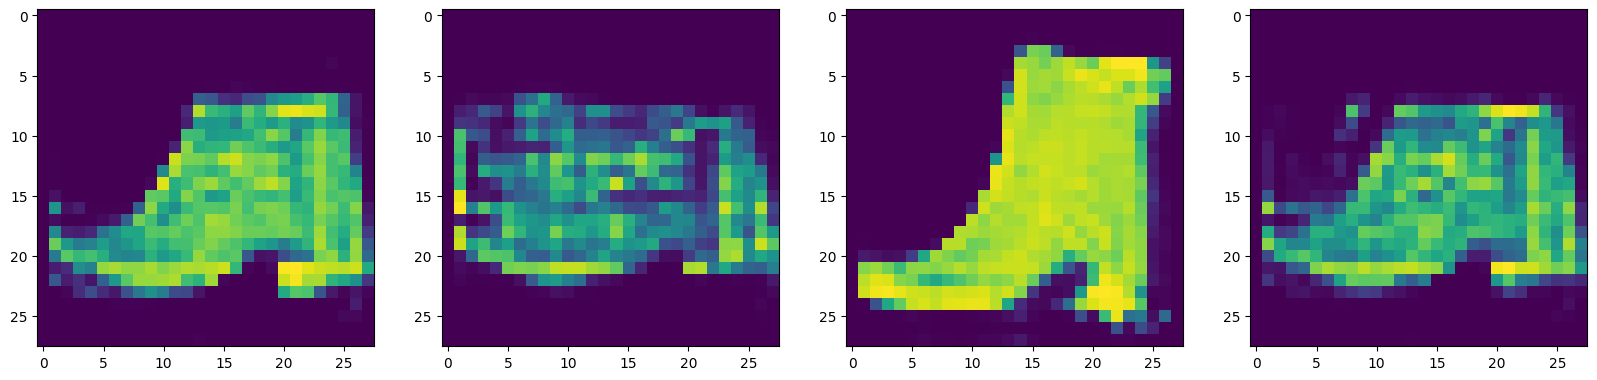

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))

for idx, img_sub in enumerate(img):
    sample= img_sub
    ax[idx].imshow(np.squeeze(sample))

In [ ]:
hist = fashgan.fit(ds, epochs=1000, callbacks=[ModelMonitor()])

Epoch 1/1000
  6/469 [..............................] - ETA: 1:14 - d_loss: 0.6630 - g_loss: 0.7001

106/469 [=====>........................] - ETA: 1:00 - d_loss: 0.7069 - g_loss: 0.6375

KeyboardInterrupt: ignored